# 4.10 Instacard Data Analysis

#### Contents
Importing libraries & data
Dropping PII information
Region llags and analysis
Customer profiling
Visualizations
Customer profile aggregates
Customer and regional comparison and visualization

## Importing libraries & data (Q1)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create project folder path
path=r'C:\Users\Bori\Documents\Careerfoundry\Achievement 4'

In [3]:
#Import the “combined_all.pkl” file into Jupyter as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'combined_all.pkl'))

## Dropping PII information (Q2)

To consider data potential data security issues, the columns have to be examined.

In [4]:
df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,prior_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,frequency_flag,first_name,surname,gender,state,age,date_joined,dependents,family_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


The first_name and surname are columns contain personal data, and they are not necessary for the analyses required by the project brief, therefore they can be dropped.

In [5]:
#Dropping columns for PII reasons
df = df.drop(columns = ['first_name'])

In [6]:
#Dropping columns for PII reasons
df = df.drop(columns = ['surname'])

In [7]:
#Dropping columns with no valuable info
df = df.drop(columns = ['eval_set'])

In [8]:
#Dropping columns with no valuable info
df = df.drop(columns = ['Unnamed: 0_x'])

In [9]:
df.head()

,order_id,user_id,prior_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Creating region flag (Q3)

In [10]:
# Creating region groups
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
West

['Idaho',
 'Montana',
 'Wyoming',
 'Nevada',
 'Utah',
 'Colorado',
 'Arizona',
 'New Mexico',
 'Alaska',
 'Washington',
 'Oregon',
 'California',
 'Hawaii']

In [12]:
Northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [13]:
# Creating region flag
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [14]:
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
df.shape

(32404859, 29)

### Comparing regional spending habits

In [16]:
# Creating a crosstab
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [17]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [18]:
# Copy crosstab to Excel
crosstab.to_clipboard()

## Exclusion flag for low activity customers (Q4)

In [19]:
df['max_order'].head()

0    10
1    10
2    10
3    10
4    10
Name: max_order, dtype: int64

In [20]:
# Creating a subset for orders greater than 5
df_max = df[df['max_order']>5]

In [21]:
df_max.shape

(30171424, 29)

In [22]:
#Exporting subset
df_max.to_pickle(os.path.join(path, '02 Data','Prepared data', 'order_over_5.pkl'))

## Customer profiling (Q5)


### Age profiling

In [23]:
df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [24]:
df['age'].mean()

49.465269853511785

In [25]:
df['age'].min()

18

In [26]:
df['age'].max()

81

In [27]:
df['age'].median()

49.0

### Creating age group flags

In [28]:
# Age group flags
df.loc[df['age']>= 65, 'age_group'] = 'Senior'

In [29]:
df.loc[(df['age'] < 65) & (df['age'] >= 35), 'age_group'] = 'Middle Aged'

In [30]:
df.loc[df['age'] <35, 'age_group'] = 'Young Adult'

In [31]:
df['age_group'].value_counts(dropna = False)

Middle Aged    15202120
Young Adult     8627655
Senior          8575084
Name: age_group, dtype: int64

### Income profiling

In [32]:
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
df['income'].mean()

99437.73329450376

In [34]:
df['income'].median()

96618.0

In [35]:
df['income'].min()

25903

In [36]:
df['income'].max()

593901

### Creating income flags

In [37]:
df.loc[df['income'] <70000, 'income_flag'] = 'Lower income'

In [38]:
df.loc[(df['income'] >=70000) & (df['income'] < 125000), 'income_flag'] = 'Middle income'

In [39]:
df.loc[(df['income'] >= 125000) & (df['income'] < 250000), 'income_flag'] = 'Higher income'

In [40]:
df.loc[df['income'] >= 250000, 'income_flag'] = 'Very high income'

In [41]:
df['income_flag'].value_counts(dropna = False)

Middle income       14778187
Lower income         8995715
Higher income        8448377
Very high income      182580
Name: income_flag, dtype: int64

### Dependents

In [42]:
df['dependents'].max()

3

In [43]:
df['dependents'].min()

0

In [44]:
df['dependents'].median()

2.0

In [45]:
df['dependents'].mean()

1.5018956570679725

### Creating dependents flag

In [46]:
df.loc[df['dependents'] == 0, 'dependents_flag'] = 'No Dependents'

In [47]:
df.loc[(df['dependents'] >= 1) &  (df['dependents'] < 3), 'dependents_flag'] = 'Has Dependents'

In [48]:
df.loc[df['dependents'] >= 3, 'dependents_flag'] = 'Big Family'

In [49]:
df['dependents_flag'].value_counts(dropna = False)

Has Dependents    16172247
Big Family         8135109
No Dependents      8097503
Name: dependents_flag, dtype: int64

## Visualisations (Q6)

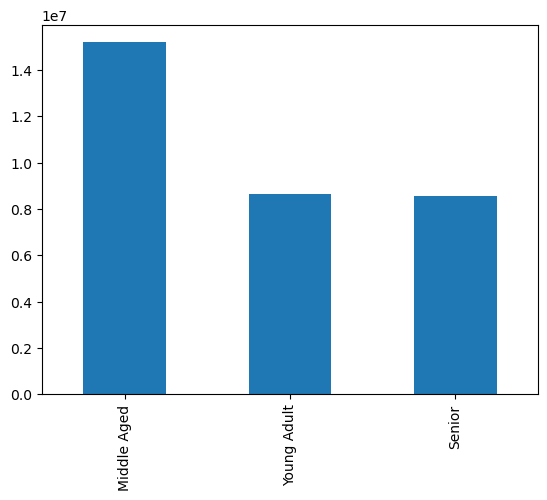

In [50]:
# Bar chart for age_group
bar_age_group = df['age_group'].value_counts().plot.bar()

In [51]:
# Exporting age_group bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

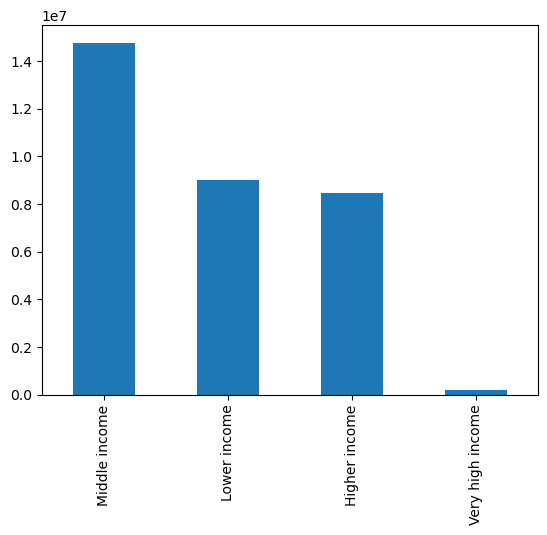

In [52]:
# Creating bar chart for income
bar_income = df['income_flag'].value_counts().plot.bar()

In [51]:
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income.png'))

### Department info

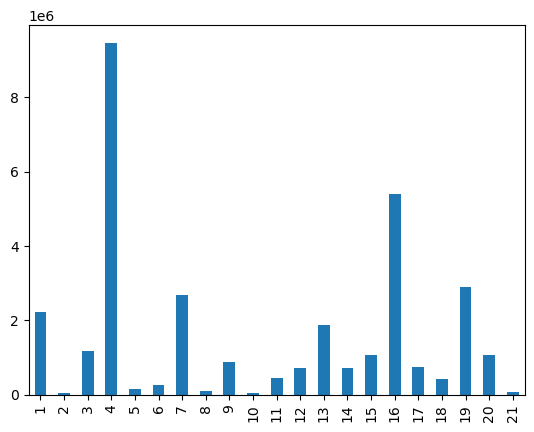

In [53]:
# department_id purchases
bar_dept = df['department_id'].value_counts().sort_index().plot.bar()

In [53]:
# Giving names to department_id numbers
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [54]:
# df for counts
department_counts = df['department_id'].value_counts()

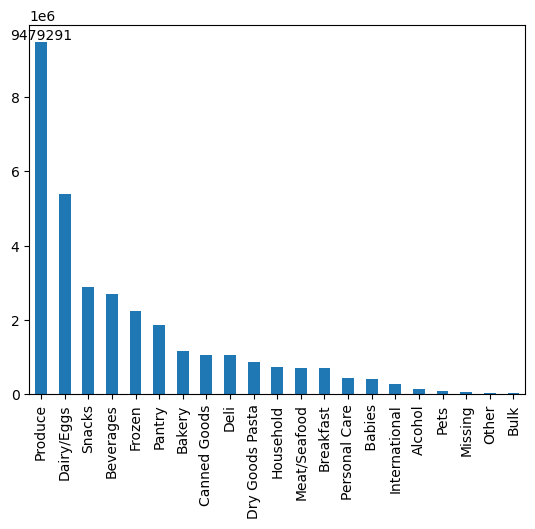

In [55]:
ax = department_counts.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [56]:
# exporting bar chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

In [57]:
# grouping for age and department
age_department_counts = df.groupby(['department_id','age_group']).size().unstack(fill_value=0)

In [58]:
df.head()

,order_id,user_id,prior_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,dependents,family_status,income,region,age_group,income_flag,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,South,Young Adult,Lower income,Big Family
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Young Adult,Lower income,Big Family
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Young Adult,Lower income,Big Family
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Young Adult,Lower income,Big Family
4,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Young Adult,Lower income,Big Family


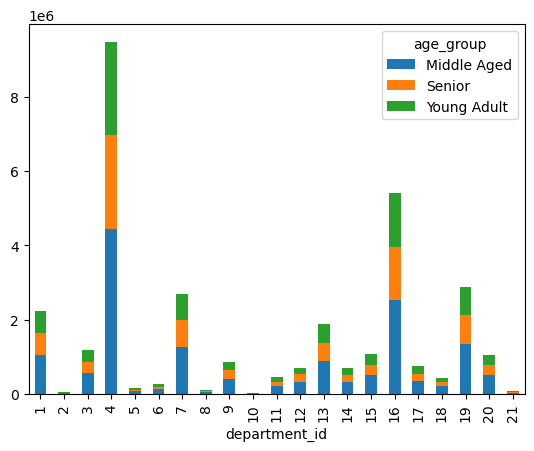

In [59]:
# bar chart of age and department id
bar_age_department = age_department_counts.plot.bar(stacked=True)

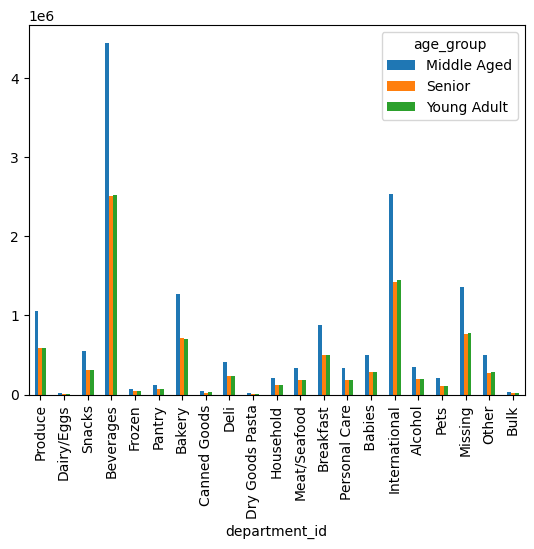

In [63]:
ax2 = age_department_counts.plot.bar()
ax2.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(age_department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [64]:
# Exporting chart
ax2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))

In [65]:
# exporting chart
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department_num.png'))

In [67]:
# Grouping for department and income
department_income_counts = df.groupby(['department_id','income_flag']).size().unstack(fill_value=0)

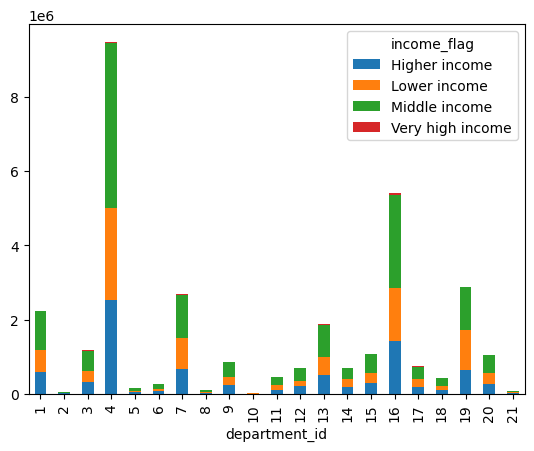

In [68]:
# Creating income bar chart
bar_depart_income = department_income_counts.plot.bar(stacked=True)

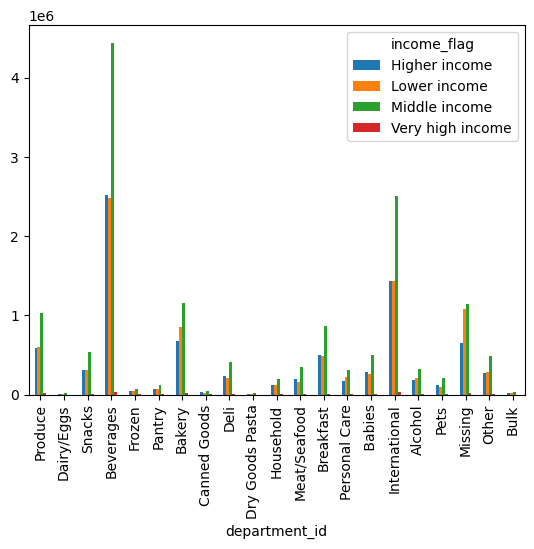

In [69]:
ax3 = department_income_counts.plot.bar()
ax3.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_income_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [70]:
# exporting chart
bar_depart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depart_income.png'))

In [71]:
# exporting chart
ax3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depart_income_named.png'))

### Family info

In [73]:
# Grouping family status and income
fam_income_counts = df.groupby(['family_status','income_flag']).size().unstack(fill_value=0)

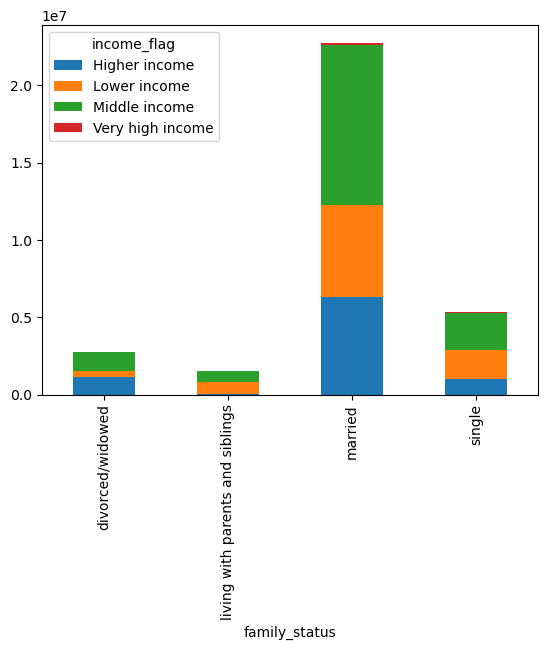

In [74]:
# Bar chart for fam status and income
fam_income_counts = fam_income_counts.plot.bar(stacked=True )

In [75]:
# Exporting fam income chart
fam_income_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_income_bar.png'))

In [76]:
# Grouping family status and age group
fam_age_counts = df.groupby(['family_status','age_group']).size().unstack(fill_value=0)

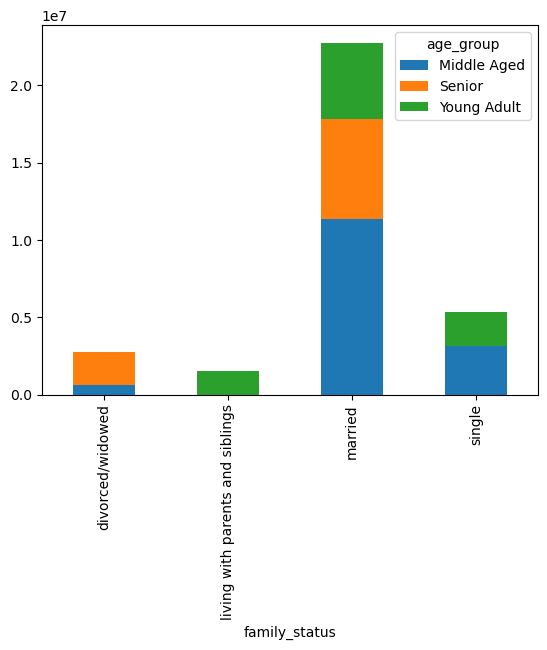

In [77]:
bar_fam_age = fam_age_counts.sort_index().plot.bar(stacked=True )

In [78]:
# Grouping dependents flag  and income
dep_income_counts = df.groupby(['dependents_flag','income_flag']).size().unstack(fill_value=0)

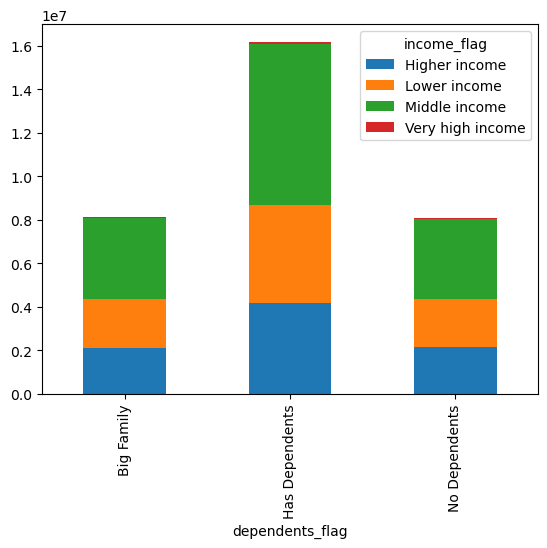

In [79]:
bar_dep_income = dep_income_counts.sort_index().plot.bar(stacked=True )

In [80]:
# Exporting fam income chart
bar_dep_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_income_bar.png'))

In [81]:
# Exporting fam income chart
bar_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_age_bar.png'))

In [86]:
# Grouping dependents flag  and family status
dep_fam_counts = df.groupby(['family_status','dependents_flag']).size().unstack(fill_value=0)

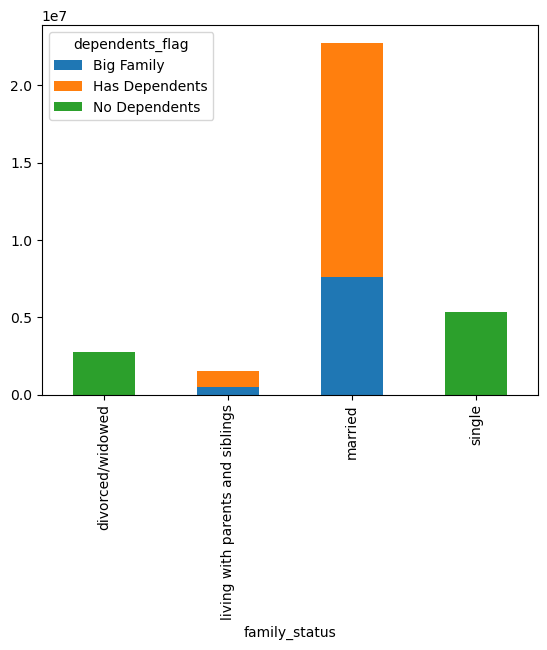

In [87]:
bar_dep_fam = dep_fam_counts.sort_index().plot.bar(stacked=True )

In [88]:
# Exporting fam income chart
bar_dep_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_fam_bar.png'))

## Aggregations (Q7)


In [54]:
# Age and spending aggregations
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Middle Aged  11.989499  1.0  99999.0
Senior       11.768850  1.0  99999.0
Young Adult  12.173973  1.0  99999.0

In [58]:
# income and spending aggregations
df.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
income_flag                               
Higher income      16.212094  1.0  99999.0
Lower income        7.357899  1.0  14900.0
Middle income       9.322505  1.0  99999.0
Very high income  259.022644  1.0  99999.0

In [59]:
# dependants and spending aggregations
df.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependents_flag                         
Big Family       11.793264  1.0  99999.0
Has Dependents   11.999659  1.0  99999.0
No Dependents    12.129243  1.0  99999.0

In [60]:
# fam status and spending
df.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
family_status                                            
divorced/widowed                  11.453674  1.0  99999.0
living with parents and siblings  10.828768  1.0  99999.0
married                           12.005659  1.0  99999.0
single                            12.480849  1.0  99999.0

In [61]:
# age and frequency
df.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Middle Aged              11.108966  0.0  30.0
Senior                   11.078641  0.0  30.0
Young Adult              11.120753  0.0  30.0

In [62]:
# income and frequency
df.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
income_flag                                       
Higher income                 11.041118  0.0  30.0
Lower income                  11.282311  0.0  30.0
Middle income                 11.042843  0.0  30.0
Very high income              10.248461  0.0  30.0

In [63]:
# dependants and frequency
df.groupby('dependents_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependents_flag                                  
Big Family                   11.109714  0.0  30.0
Has Dependents               11.112901  0.0  30.0
No Dependents                11.080805  0.0  30.0

In [64]:
# family status and frequency
df.groupby('family_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
family_status                                                     
divorced/widowed                              11.047780  0.0  30.0
living with parents and siblings              11.048170  0.0  30.0
married                                       11.116175  0.0  30.0
single                                        11.097992  0.0  30.0

## Regional Data (Q8)

In [100]:
# grouping region and ages
region_age_counts = df.groupby(['region','age_group']).size().unstack(fill_value=0)

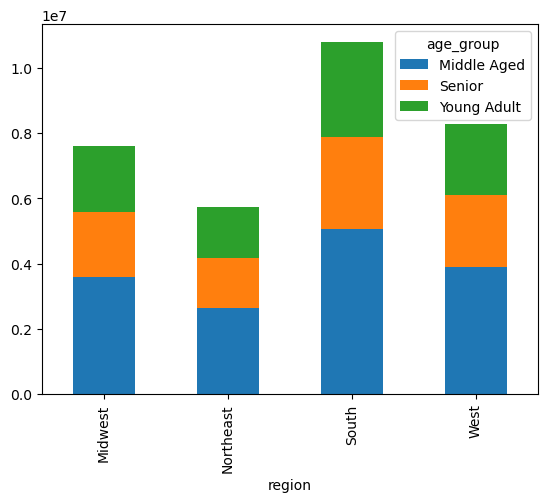

In [101]:
# bar chart for region and ages
region_age = region_age_counts.sort_index().plot.bar(stacked=True )

In [102]:
# Exporting region and age bar chart
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age.png'))

In [103]:
# grouping fam status and region
fam_region_counts = df.groupby(['region','family_status']).size().unstack(fill_value=0)

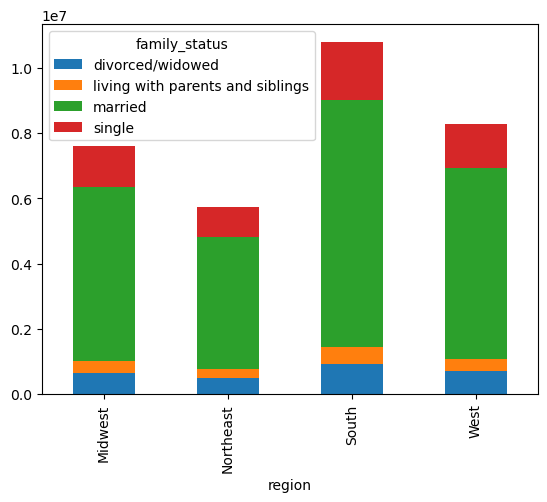

In [104]:
# bar chart for fam status and region
bar_fam_region = fam_region_counts.sort_index().plot.bar(stacked=True)

In [106]:
# exporting fam status region chart
bar_fam_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_region.png'))

In [107]:
# grouping for region and dependants
region_depend_counts = df.groupby(['region', 'dependents_flag']).size().unstack(fill_value=0)

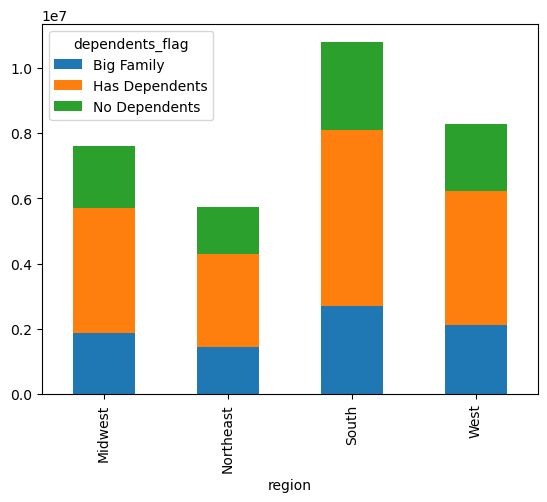

In [108]:
# bar chart for region and dependants
bar_region_depend = region_depend_counts.sort_index().plot.bar(stacked=True)

In [109]:
# exporting bar chart
bar_region_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_dependants.png'))

In [110]:
# exporting data
df.to_pickle(os.path.join(path, '02 Data','Prepared data', 'combined_all_final.pkl'))